In [1]:
import os, numpy, PIL
from PIL import Image
from tqdm import tqdm 

# Access all PNG files in directory
allfiles=os.listdir(os.getcwd())
imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"] and "e25" in filename]

# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(imlist[0]).size
N=len(imlist)
# N = 100

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((h,w,3),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for i in tqdm(range(N)):
    im = imlist[i]
    imarr=numpy.array(Image.open(im),dtype=numpy.float)
    imarr = imarr[:,:,:3]
    arr=arr+imarr/N
arrcopy = numpy.array(arr)


/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_51929/518990181.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr=numpy.zeros((h,w,3),numpy.float)
  0%|          | 0/875 [00:00<?, ?it/s]/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_51929/518990181.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imarr=nu

KeyboardInterrupt: 

In [ ]:
# Round values in array and cast as 8-bit integer

arr = numpy.array(arrcopy)

arr=numpy.array(numpy.round(arr*275*N)/N,dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()

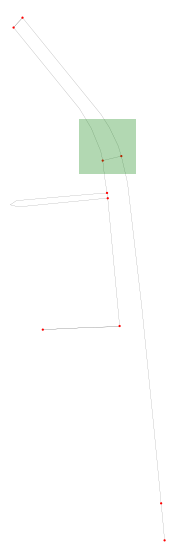

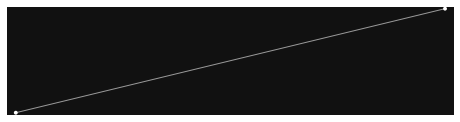

(<Figure size 576x576 with 1 Axes>, <AxesSubplot: >)

In [2]:
import numpy as np
import osmnx as ox
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

N, S, E, W = 1.3235381983186159, 1.319982801681384, \
                           103.85361309942331 , 103.84833190057668,
graph = ox.graph_from_bbox(N, S, E, W, \
                           network_type='drive')
nodes= ox.graph_to_gdfs(graph, nodes=True, edges=False)
edges= ox.graph_to_gdfs(graph, edges=True, nodes=False)
fig, ax = ox.plot.plot_graph(
                graph,
                ax=None,
                figsize=(10, 10),
                bgcolor="white",
                node_color="red",
                node_size=5,
                node_alpha=None,
                node_edgecolor="none",
                node_zorder=1,
                edge_color="black",
                edge_linewidth=0.1,
                edge_alpha=None,
                show=False,
                close=False,
                save=False,
                bbox=None,
            )
W_ = W + (E-W) * 0.8
S_ = S + (N-S)*0.7
width = (E - W)*0.07 
height = (N - S)*0.1 

rect = plt.Rectangle((W_, S_), width, height, facecolor="green", alpha=0.3, edgecolor=None)
ax.add_patch(rect)
plt.show()

g_truncated = ox.truncate.truncate_graph_bbox(graph, S_ + height, S_, W_+width, W_, truncate_by_edge=False)
ox.plot_graph(g_truncated)





In [3]:
gs_nodes.columns

NameError: name 'gs_nodes' is not defined

In [74]:
gs_edges[["geometry"]].iloc[0]

geometry    LINESTRING (103.85275 1.32231, 103.85274 1.32235)
Name: (250072296, 7165569772, 0), dtype: geometry

gs_nodes.shape : (10, 5)
POINT (103.85286058741475 1.3224715793274462)
POINT (103.85272320020604 1.3224715793274462)
POINT (103.8527203202912 1.3228271189911693)
POINT (103.85260243144342 1.3228271189911693)


/Users/nishant/opt/anaconda3/envs/wsdslworking/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_51929/1451278098.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gs_nodes = gs_nodes.append(pd.Series(new_row, index=gs_nodes.columns\
/Users/nishant/opt/anaconda3/envs/wsdslworking/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_51929/1451278098.py:40: Futur

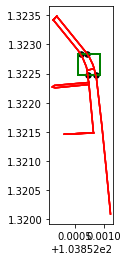

In [20]:
import pandas as pd
from shapely.geometry import Point, LineString
import osmnx as ox 
from osmnx import utils_graph
from smartprint import smartprint as sprint 


G = graph
gs_nodes, gs_edges = utils_graph.graph_to_gdfs(G)
sprint (gs_nodes.shape)

E = W_+width 
W = W_ 
S = S_ 
N = S_ + height
bbox_lines = [
              LineString([Point(W,S), Point(E,S)]), \
              LineString([Point(E,S), Point(E,N)]), \
              LineString([Point(E,N), Point(W,N)]), \
              LineString([Point(W,N), Point(W,S)]), \
             ]

int_list = []
for bbox_line in bbox_lines:
    for i in range(gs_edges.shape[0]):
        a = (pd.Series(gs_edges[["geometry"]].iloc[i]))

        intersection = a[0].intersection(bbox_line)
        int_list.append(intersection)
        if intersection.wkt != "LINESTRING EMPTY":
            print (intersection)
#             ox.utils_geo.interpolate_points(gs_edges, dist)
            plt.scatter(*intersection.xy, s=30, color="black")

            x = np.round(int_list[-1].xy[0][0], 6)
            y = np.round(int_list[-1].xy[1][0], 6)
            
            new_row = [y, x, 3, np.nan, Point(x,y)]

            gs_nodes = gs_nodes.append(pd.Series(new_row, index=gs_nodes.columns\
                                      [:len(new_row)]), ignore_index=True)
            
        plt.plot(*(a[0]).xy, color="red")
        plt.plot(*(bbox_line.xy), color="green")
plt.gca().set_aspect('equal')
plt.savefig("Interpolated.png", dpi=600)
plt.show()

In [21]:
gs_nodes.iloc[5]

y                                   1.322556
x                                 103.852713
street_count                               3
highway                                  NaN
geometry        POINT (103.8527134 1.322556)
Name: 5, dtype: object

In [22]:
gs_nodes.iloc[13]

y                                  1.322827
x                                103.852602
street_count                              3
highway                                 NaN
geometry        POINT (103.852602 1.322827)
Name: 13, dtype: object

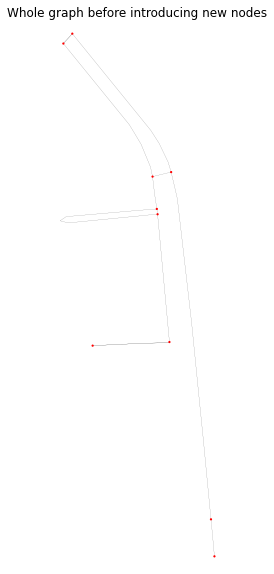

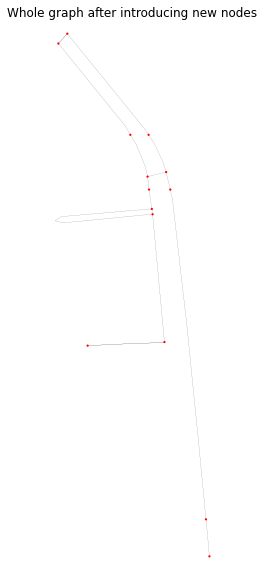

In [23]:

fig, ax = ox.plot.plot_graph(
                G,
                ax=None,
                figsize=(10, 10),
                bgcolor="white",
                node_color="red",
                node_size=5,
                node_alpha=None,
                node_edgecolor="none",
                node_zorder=1,
                edge_color="black",
                edge_linewidth=0.1,
                edge_alpha=None,
                show=False,
                close=False,
                save=False,
                bbox=None,
            )
plt.title("Whole graph before introducing new nodes")
plt.gca().set_aspect('equal')

# ox.utils_geo.round_geometry_coords(gs_nodes, precision=6)
graph2 = ox.graph_from_gdfs(gs_nodes, gs_edges)
fig, ax = ox.plot.plot_graph(
                graph2,
                ax=None,
                figsize=(10, 10),
                bgcolor="white",
                node_color="red",
                node_size=5,
                node_alpha=None,
                node_edgecolor="none",
                node_zorder=1,
                edge_color="black",
                edge_linewidth=0.1,
                edge_alpha=None,
                show=False,
                close=False,
                save=False,
                bbox=None,
            )
plt.title("Whole graph after introducing new nodes")
plt.gca().set_aspect('equal')



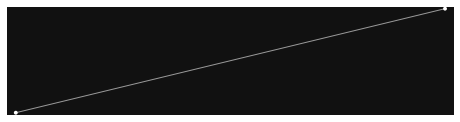

Truncated before fix (above)


KeyError: 'x'

In [24]:
g_truncated = ox.truncate.truncate_graph_bbox(graph, N, S, E, W)
ox.plot_graph(g_truncated)

print ("Truncated before fix (above)")

g_truncated = ox.truncate.truncate_graph_bbox(graph2, N, S, E, W)
ox.plot_graph(g_truncated)
print ("Truncated after fix (below)")

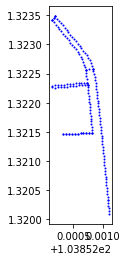

In [171]:
for j in range(gs_edges.shape[0]):
    a = ox.utils_geo.interpolate_points((gs_edges[["geometry"]].iloc[j])[0], dist=0.00005 )
    for i in a:
#         print (i, j)
        plt.scatter(i[0], i[1], color="blue", s=1)
    #     print (i)
plt.gca().set_aspect('equal')
plt.show()

In [146]:
plt

<module 'matplotlib.pyplot' from '/Users/nishant/opt/anaconda3/envs/wcs/lib/python3.10/site-packages/matplotlib/pyplot.py'>